# 21064051 Nguyễn Hùng Anh

## 3.1 Image thresholding

Ex. 3.1 Read the images ‘grayShades.jpg’ and ‘grayFlowers.jpg’ as grayscale images. Experiment with
multiple types of thresholding by changing the parameter type and keeping the same threshold value
for each image separately. Display and compare the output images.

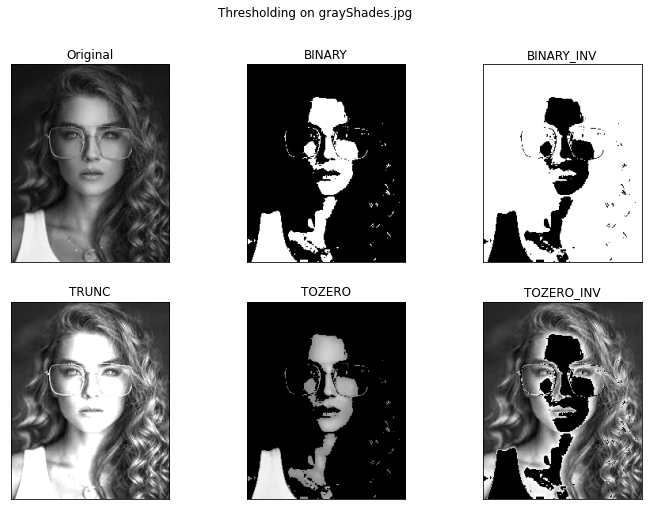

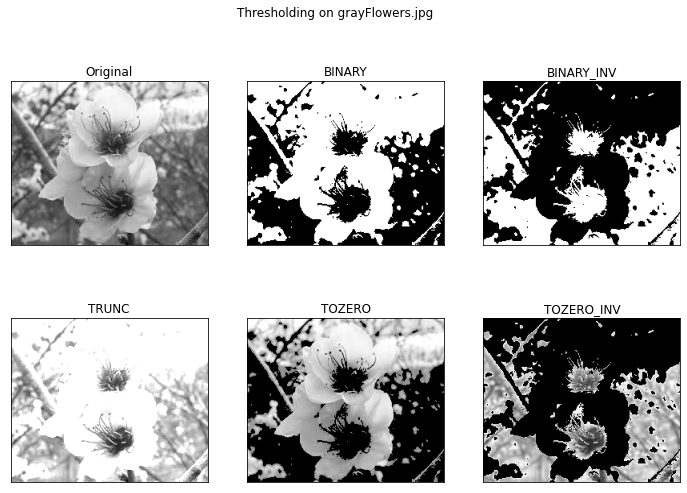

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the images as grayscale
grayShades  = cv2.imread('C:/Users/Student/Downloads/Shader.jfif', cv2.IMREAD_GRAYSCALE)
grayFlowers  = cv2.imread('C:/Users/Student/Downloads/Flowers.jfif', cv2.IMREAD_GRAYSCALE)

# Define the threshold value
threshold_value = 127

# Apply multiple thresholding types to both images
types = [cv2.THRESH_BINARY, cv2.THRESH_BINARY_INV, cv2.THRESH_TRUNC, cv2.THRESH_TOZERO, cv2.THRESH_TOZERO_INV]
types_names = ['BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']

def apply_thresholding(image, threshold_value):
    results = []
    for thresh_type in types:
        retval, thresh_img = cv2.threshold(image, threshold_value, 255, thresh_type)
        results.append(thresh_img)
    return results

# Apply thresholding for each image
thresh_grayShades = apply_thresholding(grayShades, threshold_value)
thresh_grayFlowers = apply_thresholding(grayFlowers, threshold_value)

# Function to display images
def display_images(original_img, thresholded_imgs, title):
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 3, 1), plt.imshow(original_img, cmap='gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])
    
    for i in range(len(thresholded_imgs)):
        plt.subplot(2, 3, i+2), plt.imshow(thresholded_imgs[i], cmap='gray')
        plt.title(f'{types_names[i]}'), plt.xticks([]), plt.yticks([])

    plt.suptitle(title)
    plt.show()

# Display the results
display_images(grayShades, thresh_grayShades, 'Thresholding on grayShades.jpg')
display_images(grayFlowers, thresh_grayFlowers, 'Thresholding on grayFlowers.jpg')


• Ex. 3.2 Read the image ‘adeverinta.jpg’ as grayscale and repeat the previous exercise. Comment on
the output.

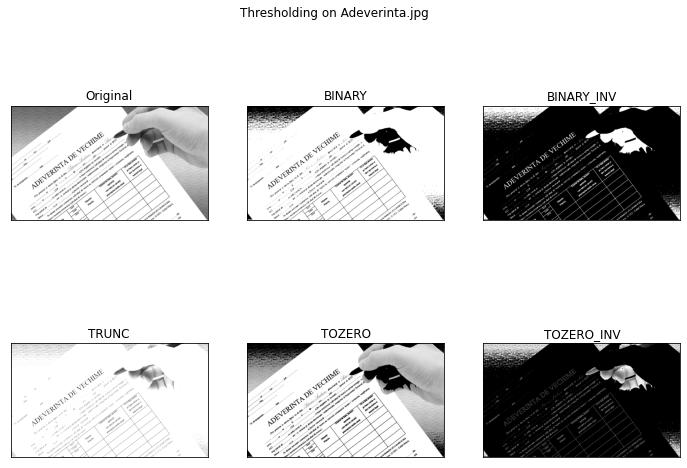

In [8]:
grayAdeverinta  = cv2.imread('C:/Users/Student/Downloads/adeverinta.jpg', cv2.IMREAD_GRAYSCALE)
thresh_grayAdeverinta = apply_thresholding(grayAdeverinta, threshold_value)
display_images(grayAdeverinta, thresh_grayAdeverinta, 'Thresholding on Adeverinta.jpg')

### 3.1.1 Adaptive thresholding

Ex. 3.3 Read the image ‘adeverinta.jpg’ as grayscale and apply adaptive thresholding (both options).
Compare the results with the ones from Ex. 3.2 and justify the outputs. The image has different lighting
conditions in different areas and a smoothing filter applied before using adaptive thresholding will
reduce the noise.


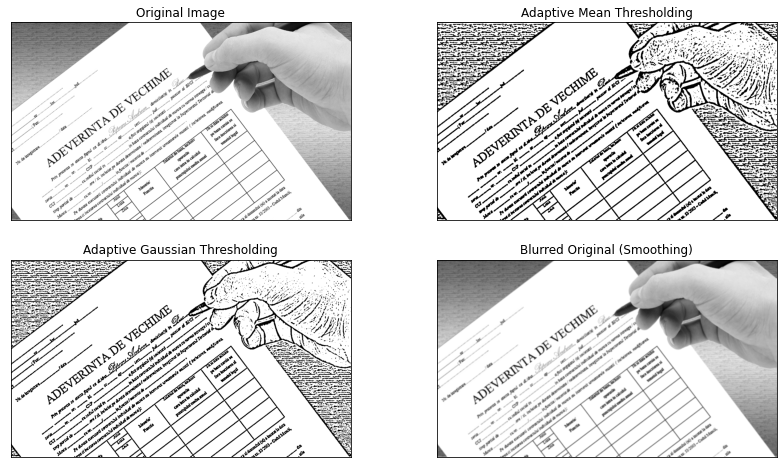

In [12]:
# Load the adeverinta.jpg image in grayscale mode
adeverinta = cv2.imread('C:/Users/Student/Downloads/adeverinta.jpg', cv2.IMREAD_GRAYSCALE)

# Apply a Gaussian blur to reduce noise before adaptive thresholding
adeverinta_blurred = cv2.GaussianBlur(adeverinta, (5, 5), 0)

# Apply Adaptive Mean Thresholding
adaptive_mean = cv2.adaptiveThreshold(adeverinta_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)

# Apply Adaptive Gaussian Thresholding
adaptive_gaussian = cv2.adaptiveThreshold(adeverinta_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# Display the original and adaptive thresholding images
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1), plt.imshow(adeverinta, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 2), plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 3), plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholding'), plt.xticks([]), plt.yticks([])

plt.subplot(2, 2, 4), plt.imshow(adeverinta_blurred, cmap='gray')
plt.title('Blurred Original (Smoothing)'), plt.xticks([]), plt.yticks([])

plt.show()

### 3.1.2 Otsu’s thresholding

Ex. 3.4 Read the images ‘rose.jpg’ and ‘yellowFl.jpg’ as grayscale and apply Otsu thresholding.
Compare the results with the previous methods. Experiment also with gaussian smoothing before the
Otsu binarization.

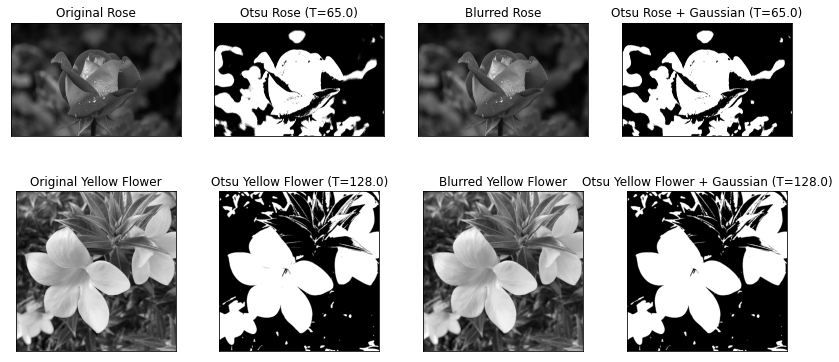

Otsu threshold value for rose: 65.0
Otsu threshold value for yellow flower: 128.0
Otsu threshold value for blurred rose: 65.0
Otsu threshold value for blurred yellow flower: 128.0


In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the images as grayscale
rose = cv2.imread('C:/Users/Student/Downloads/Rose.jpg', 0)
yellow_fl = cv2.imread('C:/Users/Student/Downloads/YellowFL.jpg', 0)

# Apply Gaussian blur before Otsu's thresholding
rose_blurred = cv2.GaussianBlur(rose, (5, 5), 0)
yellow_fl_blurred = cv2.GaussianBlur(yellow_fl, (5, 5), 0)

# Apply Otsu's thresholding (without Gaussian blur)
ret1, rose_otsu = cv2.threshold(rose, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret2, yellow_fl_otsu = cv2.threshold(yellow_fl, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply Otsu's thresholding (with Gaussian blur)
ret3, rose_otsu_blurred = cv2.threshold(rose_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret4, yellow_fl_otsu_blurred = cv2.threshold(yellow_fl_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the images for comparison
plt.figure(figsize=(14, 10))

# Original images
plt.subplot(3, 4, 1), plt.imshow(rose, cmap='gray')
plt.title('Original Rose'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 4, 5), plt.imshow(yellow_fl, cmap='gray')
plt.title('Original Yellow Flower'), plt.xticks([]), plt.yticks([])

# Otsu's thresholding without Gaussian blur
plt.subplot(3, 4, 2), plt.imshow(rose_otsu, cmap='gray')
plt.title(f'Otsu Rose (T={ret1})'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 4, 6), plt.imshow(yellow_fl_otsu, cmap='gray')
plt.title(f'Otsu Yellow Flower (T={ret2})'), plt.xticks([]), plt.yticks([])

# Blurred images (before Otsu)
plt.subplot(3, 4, 3), plt.imshow(rose_blurred, cmap='gray')
plt.title('Blurred Rose'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 4, 7), plt.imshow(yellow_fl_blurred, cmap='gray')
plt.title('Blurred Yellow Flower'), plt.xticks([]), plt.yticks([])

# Otsu's thresholding with Gaussian blur
plt.subplot(3, 4, 4), plt.imshow(rose_otsu_blurred, cmap='gray')
plt.title(f'Otsu Rose + Gaussian (T={ret3})'), plt.xticks([]), plt.yticks([])

plt.subplot(3, 4, 8), plt.imshow(yellow_fl_otsu_blurred, cmap='gray')
plt.title(f'Otsu Yellow Flower + Gaussian (T={ret4})'), plt.xticks([]), plt.yticks([])

plt.show()

# Print the Otsu threshold values
print(f'Otsu threshold value for rose: {ret1}')
print(f'Otsu threshold value for yellow flower: {ret2}')
print(f'Otsu threshold value for blurred rose: {ret3}')
print(f'Otsu threshold value for blurred yellow flower: {ret4}')
